# Problem Statement :  Develop a Model that can predict whether a employee seek treatment or not

 # Also Identify the key Features that lead to mental Health Problems in tech space.

In [2]:
# Importing Important Libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# For ignoring warnings

import warnings 
warnings.simplefilter('ignore')


# For displaying all the columns of the Dataset
pd.set_option('display.max_columns',None)

# IMPORTING DATA

In [4]:
df=pd.read_csv("D:\data sets\survey.csv")

# How Big is the Data

In [5]:
df.shape

# There are 1259 rows and 27 columns in the Dataset

(1259, 27)

# How does the data looklike 

In [6]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1042,2014-08-29 11:20:28,40,M,United States,WI,No,Yes,Yes,Sometimes,More than 1000,Yes,Yes,Yes,Yes,No,Yes,Don't know,Don't know,Yes,No,No,No,No,Maybe,Don't know,No,NaN
935,2014-08-28 22:20:33,38,Male,United Kingdom,NaN,Yes,Yes,Yes,Rarely,1-5,Yes,No,No,No,No,No,Yes,Very difficult,Maybe,No,No,No,No,No,No,No,NaN
692,2014-08-28 09:54:51,30,m,Germany,NaN,No,No,No,NaN,26-100,No,Yes,Don't know,No,No,Don't know,Yes,Somewhat easy,No,No,Some of them,No,Maybe,Maybe,Don't know,No,NaN
567,2014-08-27 19:41:28,32,Male,United States,CA,No,No,Yes,Sometimes,More than 1000,No,Yes,Yes,No,No,Yes,Don't know,Somewhat easy,No,No,Yes,Some of them,Maybe,Yes,Don't know,No,NaN
1059,2014-08-29 11:53:59,28,Female,United States,OR,No,No,Yes,Rarely,6-25,No,Yes,Yes,Yes,Don't know,Yes,Yes,Very easy,No,No,Some of them,Some of them,No,Yes,Don't know,No,NaN


# Information about the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Checking for the Missing Values

In [8]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

There are 515 missing values in the State column
264 Missing values in the work_interfare
18 in the Self_empoployed
1095 in the comments 

In [9]:
# percentage wise null values in the dataset

round((df.isna().sum()/df.shape[0])*100,2)

Timestamp                     0.00
Age                           0.00
Gender                        0.00
Country                       0.00
state                        40.91
self_employed                 1.43
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
comments                     86.97
dtype: float64

There are Almost 87% null values in the comments column, So it will not add any significance to our model.
As it is survey based data its not neccesary to add comments
We can drop that column. 

# Checking for the Duplicate Values in the dataset

In [10]:
df.duplicated().sum()

# There are no duplicate value in the Dataset.

0

In [11]:
# Checking columns that can be dropped for reducing dimensionality of the dataset

df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

This data shows that most of the mental illness is in USA .
But it is completelty Misleading as most of the people who get surveyed are from the USA.
We can drop this column too as it will lead to confusion in the Final Output.

In [12]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

After doing comprehensive study of the Data it is clear that all the state are of USA only.
In case of data from other country , State column is filled with null value.
So we will drop this column too.


# Dropping the columns 

In [13]:
df=df.drop(['Country','state','comments'],axis=1)

In [14]:
# Also dropping the Timestamp column as there is no significance of that column too it is simply giving us the time of being 
#Surveyed

df=df.drop('Timestamp',axis=1)

In [15]:
# View of the data after dropping columns

df.head()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Data description

In [16]:
round(df.describe(include='all'),2)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,615,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some Anamolies in the Data.
As Age of a person cannot be negative 
And in Gender column it is showing 49 unique values it is not Possible.

In [17]:
# gender column

df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

There are many anamolies in this column.
There are spelling errors also different names are used for the same feature.
And also we can aggregate Lesbian, Gay,Bisexual,transgender as one unique type.

In [18]:
# All these mean the Male Gender

df['Gender'].replace(['Male','male',"Male ",'M','m','Cis Male','cis male','Mail','Male-ish','Male (CIS)','Cis Man','msle','Malr','Mal',
                     'maile','Make','Man'],"Male",inplace=True)

In [19]:
# All these mean the Female Gender

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

In [20]:
# All these mean the Third Gender/Other

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [21]:
# Viewing the Final result of the Column

df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

It can seen that Male are more in the number, but it is need not to be true

In [22]:
# Age Column 

# Imputing the value in this column
# People less than 12 years are given as age 15
# People more than 80 years as 75

df.loc[df.Age<12,'Age']=15
df.loc[df.Age>75,'Age']=75

<AxesSubplot:>

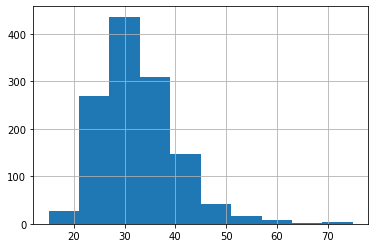

In [23]:
# Verifying the Changes made

df['Age'].hist()

Now we are good to go with this column.

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df,test_size=0.15,stratify=df['treatment'],random_state=2 )

In [25]:
# Dimensions of the train and test data

print("Train_data dimensions :",train_data.shape)
print("Test_data dimensions :",test_data.shape)

Train_data dimensions : (1070, 23)
Test_data dimensions : (189, 23)


# EDA 

In [26]:
# A copy of the original training dataset

copy1= train_data.copy()

In [27]:
# Univariate Analysis

copy1.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

# People who opt for Mental Treatment

<AxesSubplot:xlabel='treatment', ylabel='count'>

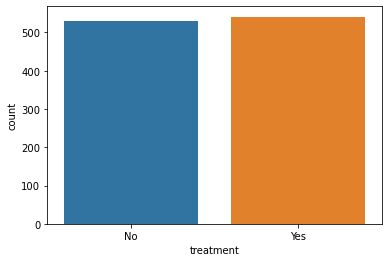

In [28]:
# Treatment column

sns.countplot(copy1["treatment"])

Little more than 50% people are taking treatment , this is our target varible and there is no such class imbalance we are reday to go with this column.


# People taking mental health treament according to the Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

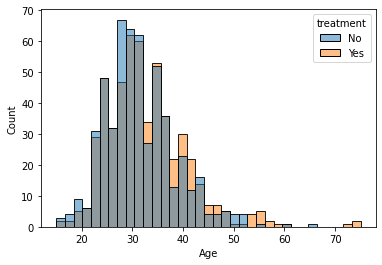

In [29]:
sns.histplot(data=copy1,x='Age',hue='treatment')

Both the curve are merging so we can take any key insight from here.

# Is Self Employment plays role In Mental Health

<AxesSubplot:xlabel='self_employed', ylabel='count'>

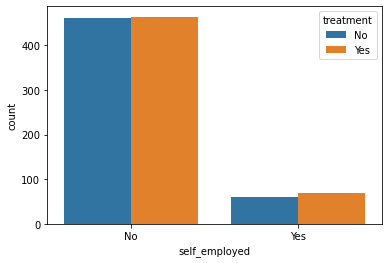

In [30]:
sns.countplot(copy1["self_employed"],hue= copy1['treatment'])

More than 80% people(approx) are not self_employed.
Despite being the large difference , people taking mental treatment are almost same.
So it does not Matter whether the person is self_employed or not , person is taking mental help.
Their is imbalance but the class distribution is same so no difference at all.

# Is your mental health affecting your workpower.

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

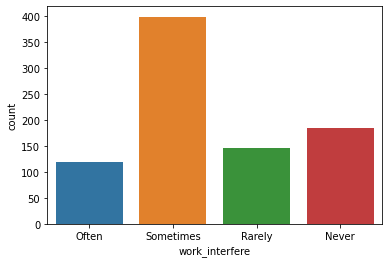

In [31]:
sns.countplot(data=copy1,x='work_interfere')

Almost 80% people feel that their mental health conditions affect their work sometimes,rarely and frequently.
Mental health conditions sometimes become an interfere while working about 45%.

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

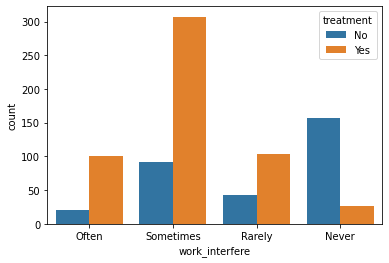

In [32]:
sns.countplot(copy1["work_interfere"],hue= copy1['treatment'])


The plots prove that almost 80% want to get treatment. But it's surprising to know even mental health never has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered by the requirements of the job do not match the capabilities, resources or needs of the worker
If you are running a tech organization , you should consider providing resources for employees seeking treatment and it will help in boosting employee experience and will definitely increase their productivity.

# Family history of mental illness

<AxesSubplot:xlabel='family_history', ylabel='count'>

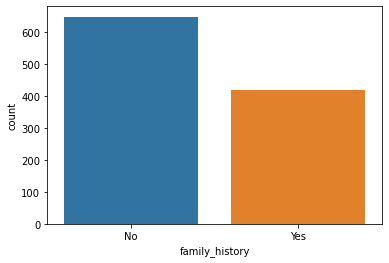

In [33]:
sns.countplot(data=copy1,x='family_history')

Their are less than 40 % people who have family history of mental health problem.


<AxesSubplot:xlabel='family_history', ylabel='count'>

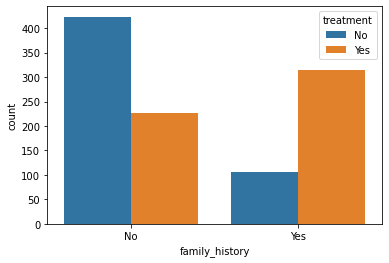

In [34]:
sns.countplot(data=copy1,x='family_history',hue='treatment')

It clearly shows people who have mental health problems in their Family are more bound to take treatment in comparison of the 
people who dont have mental health problems in their family.

This will be an important feature.

#  People doing remote work(more than 50% of their time)

<AxesSubplot:xlabel='remote_work', ylabel='count'>

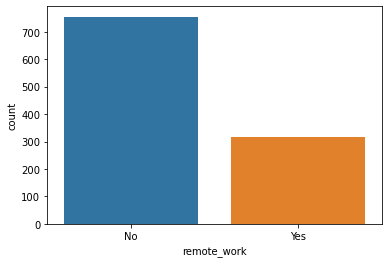

In [35]:
sns.countplot(data=copy1,x='remote_work')

<AxesSubplot:xlabel='remote_work', ylabel='count'>

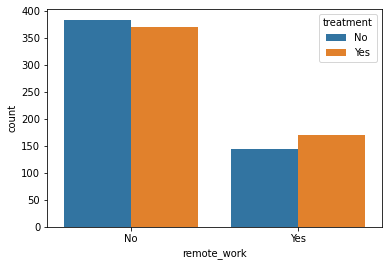

In [36]:
sns.countplot(data=copy1,x='remote_work',hue='treatment')

Doesn't matter remote work or not, almost 50% of people in both categories seek treatment.
People in remote work are sligtly more in number who seek treatment.
It might be due to lack of social interaction in remote mode.

# does employer provide mental health benefits 

<AxesSubplot:xlabel='benefits', ylabel='count'>

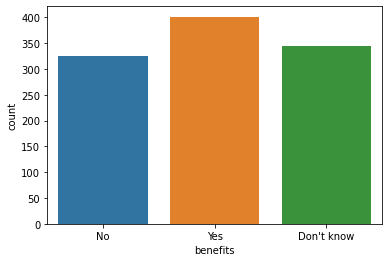

In [37]:
sns.countplot(data=copy1,x='benefits')

<AxesSubplot:xlabel='benefits', ylabel='count'>

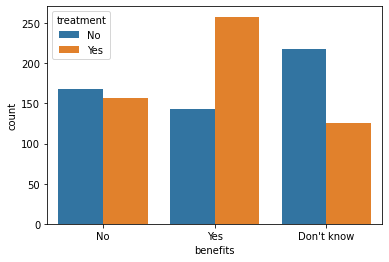

In [38]:
sns.countplot(data=copy1,x='benefits',hue='treatment')

In [39]:
copy1['benefits'].value_counts(normalize=True)

Yes           0.374766
Don't know    0.321495
No            0.303738
Name: benefits, dtype: float64

We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
Coming to the second graph,we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help. So we can see the employer resources are utilized to a larger extent.
Even if you think about the cost , you should definitely go for it because it is efficiently utilized by the employees.
Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.

# Mental healthcare options provided by Employer

<AxesSubplot:xlabel='care_options', ylabel='count'>

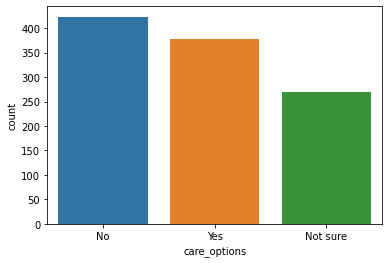

In [40]:
sns.countplot(data=copy1,x='care_options')

<AxesSubplot:xlabel='care_options', ylabel='count'>

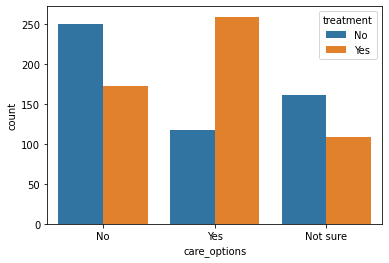

In [41]:
sns.countplot(data=copy1,x='care_options',hue='treatment')

In [42]:
copy1["care_options"].value_counts(normalize=True)

No          0.395327
Yes         0.352336
Not sure    0.252336
Name: care_options, dtype: float64

40% of employees are not provided any care options and 25% are not sure whether care options exist in company.
We can see 60% of employees whos organization dont have care options are seeking treatment. These organizations needs to address this issue. People who have care options are actually seeking treatment, this can validate our claim to have care options.

# Number of Employees in the Company

<AxesSubplot:xlabel='no_employees', ylabel='count'>

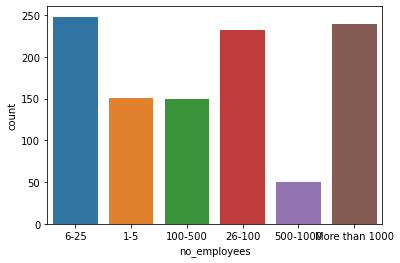

In [43]:
sns.countplot(data=copy1,x='no_employees')

<AxesSubplot:xlabel='no_employees', ylabel='count'>

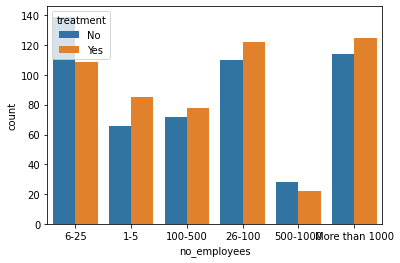

In [44]:
sns.countplot(data=copy1,x='no_employees',hue='treatment')

<AxesSubplot:xlabel='no_employees', ylabel='count'>

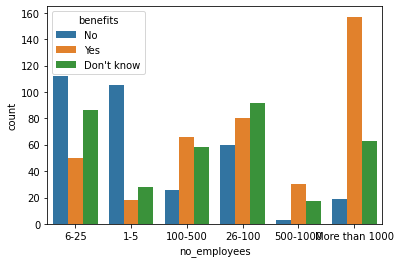

In [45]:
sns.countplot(data=copy1,x='no_employees',hue='benefits')

Smaller companies are providing less benefits than the larger one.
Size of the is not affecting whether people are seeking mental help or not.

# Does Mental Health comes in your employee wellness program 

<AxesSubplot:xlabel='wellness_program', ylabel='count'>

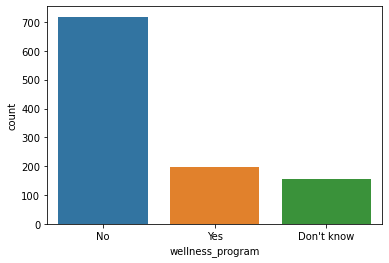

In [46]:
sns.countplot(data=copy1,x='wellness_program')

<AxesSubplot:xlabel='wellness_program', ylabel='count'>

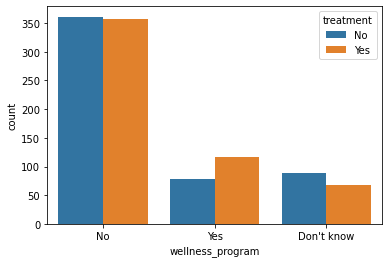

In [47]:
sns.countplot(data=copy1,x="wellness_program",hue='treatment')

In [48]:
copy1['wellness_program'].value_counts(normalize=True)

No            0.671028
Yes           0.183178
Don't know    0.145794
Name: wellness_program, dtype: float64

70% employers haven't discussed mental health as a employee wellness program.
Around 50% People who don't know about the program are seeking help. This means organizations should explain the mental health benefits provided by the company
Companies should include mental health in the employee wellness program.This shouldn't be overlooked

# Does employer provide ways to seek help in case of Mental Health

<AxesSubplot:xlabel='seek_help', ylabel='count'>

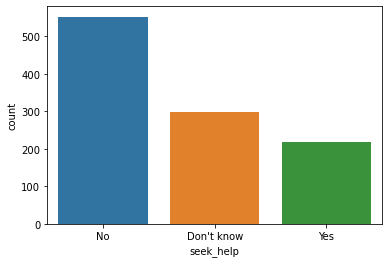

In [49]:
sns.countplot(data=copy1,x="seek_help")

<AxesSubplot:xlabel='seek_help', ylabel='count'>

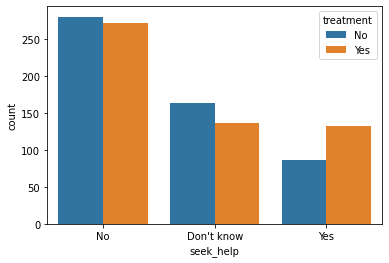

In [50]:
sns.countplot(data=copy1,x="seek_help",hue='treatment')

In [51]:
copy1['seek_help'].value_counts(normalize=True)

No            0.515888
Don't know    0.279439
Yes           0.204673
Name: seek_help, dtype: float64

More Than 51% respondents said they have not been provided ways for seeking in case of meantal health by the employers.
It can be clearly seen that the places where they provided help , more percentage of people took treatment.

# Is your Identity be remained anonymous if you use resources

<AxesSubplot:xlabel='anonymity', ylabel='count'>

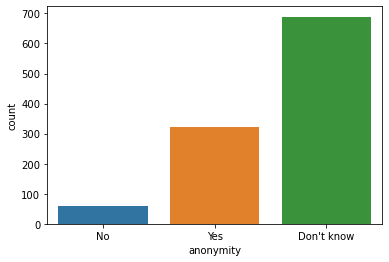

In [52]:
sns.countplot(data=copy1,x='anonymity')

<AxesSubplot:xlabel='anonymity', ylabel='count'>

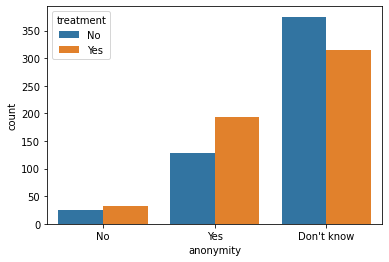

In [53]:
sns.countplot(data=copy1,x='anonymity',hue='treatment')

In [54]:
copy1['anonymity'].value_counts(normalize=True)

Don't know    0.643925
Yes           0.301869
No            0.054206
Name: anonymity, dtype: float64

Almost 65% of the respondents have no idea about it.
Companies should create a safe environment for people to feel safe to share their problems.
We can establish the fact that people who think their anonymity is protected are more willing to seek treatment.

# How easy it for you take Medical Leave for a Mental Health Condition

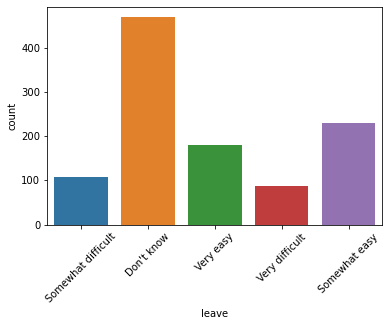

In [55]:
sns.countplot(data=copy1,x='leave')
plt.xticks(rotation=45)
plt.show()

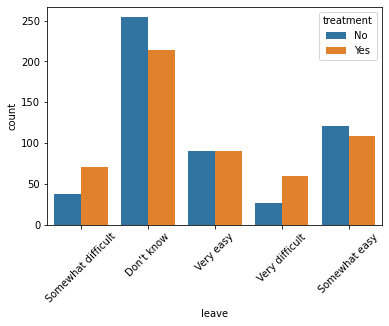

In [56]:
sns.countplot(data=copy1,x='leave',hue='treatment')
plt.xticks(rotation=45)
plt.show()

In [57]:
copy1['leave'].value_counts(normalize=True)

Don't know            0.437383
Somewhat easy         0.214019
Very easy             0.168224
Somewhat difficult    0.100000
Very difficult        0.080374
Name: leave, dtype: float64

1. 45% have no idea about it.
2. Places where Leave is Difficult to get they are more into Treatment.
3. Important feature for the Model.


   # Discussing Mental Health with employer will have -ve Impact

<AxesSubplot:xlabel='mental_health_consequence', ylabel='count'>

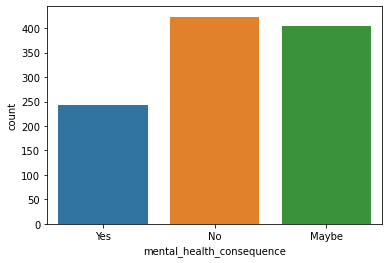

In [58]:
sns.countplot(data=copy1,x='mental_health_consequence')

<AxesSubplot:xlabel='mental_health_consequence', ylabel='count'>

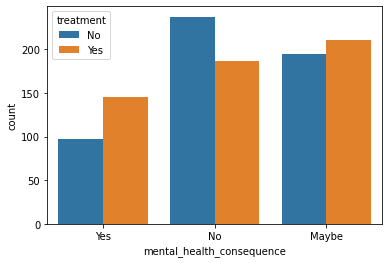

In [59]:
sns.countplot(data=copy1,x='mental_health_consequence',hue='treatment')

Around 70% of people either thinks discussing mental health problem will have negative consequence or not sure whether it will have a impact.
And out of people who think it will have a negative impact, most people seek treatment.

# Discussing Mental Health with the coworker

<AxesSubplot:xlabel='coworkers', ylabel='count'>

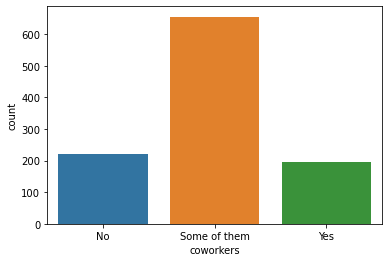

In [60]:
sns.countplot(data=copy1,x='coworkers')

<AxesSubplot:xlabel='coworkers', ylabel='count'>

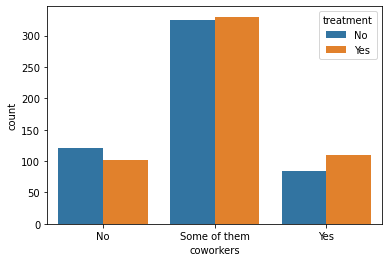

In [61]:
sns.countplot(data=copy1,x='coworkers',hue='treatment')

 Good sign that most people have atleast some people(coworkers) to talk to about the mental health issues.

# Is Mental Health Taken Seriously ?

<AxesSubplot:xlabel='mental_vs_physical', ylabel='count'>

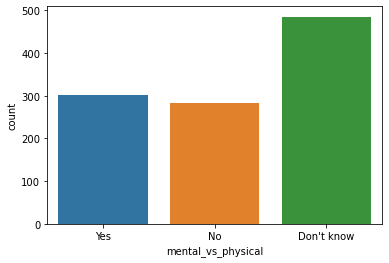

In [62]:
sns.countplot(data=copy1,x='mental_vs_physical')

<AxesSubplot:xlabel='mental_vs_physical', ylabel='count'>

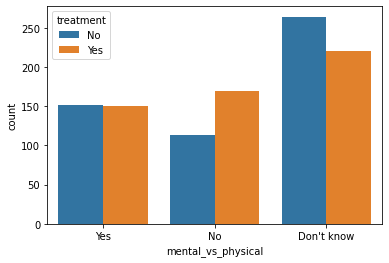

In [63]:
sns.countplot(data=copy1,x='mental_vs_physical',hue='treatment')

Places where Mental health is not treated as same as Physical Health , people are more inclined for Treatment. 

# Does Colleagues Have negative consequences about Mental Health

<AxesSubplot:xlabel='obs_consequence', ylabel='count'>

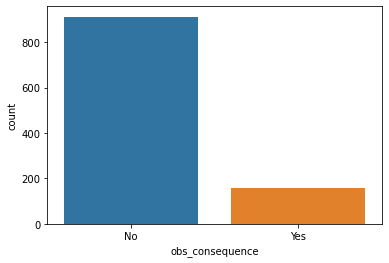

In [64]:
sns.countplot(data=copy1,x='obs_consequence')

<AxesSubplot:xlabel='obs_consequence', ylabel='count'>

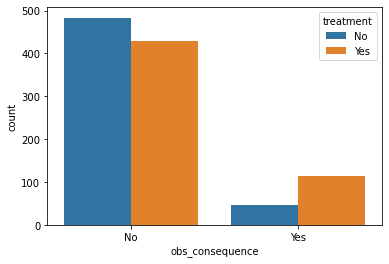

In [65]:
sns.countplot(data=copy1,x='obs_consequence',hue='treatment')

Most of the employers have not felt anything like that

# Data Preprocessing

In [66]:
# We have almost 2 % null values in the self_employed column, we will impute with mode only

se_mode=train_data['self_employed'].mode().values[0]
train_data['self_employed'].fillna(se_mode,inplace=True)


In [67]:
# # Work_interfere contains almost 20% null values which is significant as we have less data.
# Let us once see the null values to find any pattern
train_data[train_data['work_interfere'].isna()]['treatment'].value_counts()

No     217
Yes      4
Name: treatment, dtype: int64

Intersting, almost 99% of the people who didn't answer the question 'Whether mental health interferes with work' don't seek help'.
If we think null values as a category , it is more similar to category NEVER of all categories of column work_interfere. So we will use this to replace null values.

In [68]:
train_data['work_interfere'].fillna('Never',inplace = True)

In [69]:
# Verifying the Null Values in all the columns

train_data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Their is no Null Values in Any Columns 

# Dependent And Independent Variables

In [70]:
x_train=train_data.drop('treatment',axis=1)
y_train=train_data['treatment'].copy()

In [71]:
train_data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [72]:
# We will Label columns for the features having 2 classes(Label Encoding)
# We will label columns for the features having more than 2 classes(Ordinal Encoding)

# Ordinal Encoding

In [73]:
# Ordinal Encoding Preparation

gender_cols = ['Female','Male','Other']
self_employed_cols = ['No','Yes']
family_history_cols = ['No','Yes']
work_interfere_cols = ['Never','Rarely','Sometimes','Often']
no_employees_cols = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
remote_work_cols = ['No','Yes']
tech_company_cols = ['No','Yes']
benefits_cols = ['No','Don\'t know','Yes'] 
care_options_cols = ['No','Not sure','Yes']
wellness_program_cols  =['No','Don\'t know','Yes']
seek_help_cols = ['No','Don\'t know','Yes']
anonymity_cols = ['No','Don\'t know','Yes']
leave_cols = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
mental_health_consequence_cols = ['No','Maybe','Yes']
phys_health_consequence_cols = ['No','Maybe','Yes']
coworkers_col = ['No','Some of them','Yes']
supervisor_cols = ['No','Some of them','Yes']
mental_health_interview_cols = ['No','Maybe','Yes']
phys_health_interview_cols = ['No','Maybe','Yes']
mental_vs_physical_cols = ["Don't know",'No','Yes']
obs_consequence_cols = ['No','Yes']

In [74]:
columns_for_encoder = [gender_cols,self_employed_cols,family_history_cols,work_interfere_cols,no_employees_cols,remote_work_cols,
                            tech_company_cols,benefits_cols,care_options_cols,wellness_program_cols,seek_help_cols,anonymity_cols,leave_cols,
                            mental_health_consequence_cols,phys_health_consequence_cols,coworkers_col,supervisor_cols,mental_health_interview_cols,
                            phys_health_interview_cols,mental_vs_physical_cols,obs_consequence_cols]

In [75]:
# Ordinal Encoding

features = list(x_train.columns)

from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(categories=list(columns_for_encoder))
x_train[features[1:]] = ord_encoder.fit_transform(x_train.iloc[:,1:])

In [76]:
# Verifying the changes made
x_train.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
987,28,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
584,27,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0
367,36,1.0,0.0,1.0,3.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
740,37,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0
922,28,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0


# Standard Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train[features]=std_scaler.fit_transform(x_train)

In [78]:
# Verifying the Changes made

x_train.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
987,-0.535209,0.423588,-0.370254,-0.805413,1.659511,-0.804805,-0.645925,0.467631,-1.305104,-1.108155,-0.652429,-0.872155,-2.298157,1.165522,1.518413,-0.562680,-1.566481,-1.304103,-0.466156,1.730953,1.393426,-0.417772
584,-0.667496,0.423588,-0.370254,-0.805413,0.727886,-1.383918,1.548168,0.467631,-1.305104,-1.108155,-0.652429,-0.872155,1.385780,0.261820,1.518413,-0.562680,0.040551,1.071030,-0.466156,-1.060486,0.203509,-0.417772
367,0.523093,0.423588,-0.370254,1.241599,1.659511,0.353421,-0.645925,0.467631,-1.305104,1.207716,-0.652429,-0.872155,1.385780,-1.545584,-1.079032,-0.562680,0.040551,-0.116537,-0.466156,-1.060486,-0.986408,-0.417772
740,0.655380,0.423588,-0.370254,1.241599,0.727886,-0.225692,-0.645925,0.467631,-1.305104,1.207716,-0.652429,-0.872155,1.385780,-1.545584,-1.079032,-0.562680,0.040551,1.071030,-0.466156,0.335234,1.393426,2.393650
922,-0.535209,0.423588,-0.370254,1.241599,0.727886,-0.225692,-0.645925,-2.138438,1.132001,-1.108155,-0.652429,-0.872155,-0.456189,0.261820,0.219690,1.218586,0.040551,-0.116537,-0.466156,-1.060486,1.393426,-0.417772


# Label Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder

lb_encoder=LabelEncoder()
y_train=lb_encoder.fit_transform(y_train)

# MODEL BUILDING AND EVALUATION

In [80]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [81]:
# we are going to use different models for better performance

# LOGISTIC REGRESSION

In [82]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty='l1',solver='liblinear')
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(log_reg,x_train,y_train,cv=10,scoring='f1')


In [115]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cf=confusion_matrix(y_train,y_pred)
cf

array([[377, 152],
       [ 31, 510]], dtype=int64)

In [116]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       529
           1       0.77      0.94      0.85       541

    accuracy                           0.83      1070
   macro avg       0.85      0.83      0.83      1070
weighted avg       0.85      0.83      0.83      1070



In [83]:
# Verifying the Scores 

score = pd.DataFrame({'Name' : 'Logistic Regression' ,'F1_score_trainset' : [f1_train], 
                      'F1_score_validationset' : [f1_val.mean()]})
score

,Name,F1_score_trainset,F1_score_validationset
0,Logistic Regression,0.825023,0.818548


# DECISION TREE

In [84]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(max_leaf_nodes=3,random_state=2)
d_tree.fit(x_train,y_train)
y_pred=d_tree.predict(x_train)
f1_train=f1_score(y_train,y_pred)


# Cross validation
f1_val=cross_val_score(d_tree,x_train,y_train,cv=10,scoring='f1')

# Verifying the Scores 

score = pd.DataFrame({'Name' : 'DECISION TREE' ,'F1_score_trainset' : [f1_train], 
                      'F1_score_validationset' : [f1_val.mean()]})
score



,Name,F1_score_trainset,F1_score_validationset
0,DECISION TREE,0.845771,0.845624


In [118]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cf=confusion_matrix(y_train,y_pred)
cf

array([[377, 152],
       [ 31, 510]], dtype=int64)

In [119]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       529
           1       0.77      0.94      0.85       541

    accuracy                           0.83      1070
   macro avg       0.85      0.83      0.83      1070
weighted avg       0.85      0.83      0.83      1070



# SVM

In [85]:
from sklearn.svm import SVC

model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(model,x_train,y_train,cv=10,scoring='f1')

# Verifying the scores

score = pd.DataFrame({'Name' : 'SVM' ,'F1_score_trainset' : [f1_train], 
                      'F1_score_validationset' : [f1_val.mean()]})
score

,Name,F1_score_trainset,F1_score_validationset
0,SVM,0.883392,0.824692


In [121]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cf=confusion_matrix(y_train,y_pred)
cf

array([[377, 152],
       [ 31, 510]], dtype=int64)

In [120]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       529
           1       0.77      0.94      0.85       541

    accuracy                           0.83      1070
   macro avg       0.85      0.83      0.83      1070
weighted avg       0.85      0.83      0.83      1070



# RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=2)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(rfc,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"RANDOM FOREST","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score

,name,F1_Score_trainset,F1_score_validationset
0,RANDOM FOREST,1.0,0.836386


In [122]:
# Confusion Matrix and Classification Report

cf=confusion_matrix(y_train,y_pred)
cf

array([[377, 152],
       [ 31, 510]], dtype=int64)

In [123]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       529
           1       0.77      0.94      0.85       541

    accuracy                           0.83      1070
   macro avg       0.85      0.83      0.83      1070
weighted avg       0.85      0.83      0.83      1070



# ADABOOST

In [87]:
from sklearn.ensemble import AdaBoostClassifier

dt_clf_ada = DecisionTreeClassifier()
Ada_clf = AdaBoostClassifier(base_estimator=dt_clf_ada,random_state=42)
Ada_clf.fit(x_train,y_train)
y_pred=Ada_clf.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(Ada_clf,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"ADABOOST","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score

,name,F1_Score_trainset,F1_score_validationset
0,ADABOOST,1.0,0.719602


In [124]:
# Confusion Matrix and Classification Report

cf=confusion_matrix(y_train,y_pred)
cf

array([[377, 152],
       [ 31, 510]], dtype=int64)

In [125]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       529
           1       0.77      0.94      0.85       541

    accuracy                           0.83      1070
   macro avg       0.85      0.83      0.83      1070
weighted avg       0.85      0.83      0.83      1070



# GRADIENT BOOSTING

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gdb_clf = GradientBoostingClassifier(random_state=42,subsample=0.8)
gdb_clf.fit(x_train,y_train)
y_pred=gdb_clf.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(gdb_clf,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"Gradient Boosting","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score


,name,F1_Score_trainset,F1_score_validationset
0,Gradient Boosting,0.903863,0.837939


In [126]:
# Confusion Matrix and Classification Report

cf=confusion_matrix(y_train,y_pred)
cf

array([[377, 152],
       [ 31, 510]], dtype=int64)

In [127]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       529
           1       0.77      0.94      0.85       541

    accuracy                           0.83      1070
   macro avg       0.85      0.83      0.83      1070
weighted avg       0.85      0.83      0.83      1070



# XGBOOST

In [130]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(verbosity=0)
xgb_clf.fit(x_train,y_train)
y_pred=xgb_clf.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(xgb_clf,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"XG Boost","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score


,name,F1_Score_trainset,F1_score_validationset
0,XG Boost,1.0,0.804219


In [128]:
# Confusion Matrix and Classification Report

cf=confusion_matrix(y_train,y_pred)
cf

array([[377, 152],
       [ 31, 510]], dtype=int64)

In [129]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       529
           1       0.77      0.94      0.85       541

    accuracy                           0.83      1070
   macro avg       0.85      0.83      0.83      1070
weighted avg       0.85      0.83      0.83      1070



Shortlisted Models                                                                                                             
1. Decision Tree ---                                                                                                                 2. SVM ----
3. Gradient Boosting  ----                                                                                                           4.  Random Forest ----


HYPER PARAMETER TUNING SVC

In [90]:
from sklearn.model_selection import GridSearchCV
param_distribs = {
        'kernel': ['linear', 'rbf','polynomial'],
        'C': [0.01,0.01,0.1,0.15,0.2,0.25,0.5,0.75,1,2,10,100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    }
svm_clf = SVC()
grid_cv = GridSearchCV(svm_clf , param_grid = param_distribs,
                              cv=5,scoring='f1',
                              verbose=1)
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1,
                               2, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='f1', verbose=1)

In [91]:
grid_cv.best_estimator_

SVC(C=0.75, gamma=0.01)

In [92]:
grid_cv.best_estimator_.fit(x_train,y_train)
y_pred=grid_cv.best_estimator_.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(grid_cv.best_estimator_,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"SVM","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score

,name,F1_Score_trainset,F1_score_validationset
0,SVM,0.847222,0.836403


HYPER PARAMETER TUNING Decision Tree

In [93]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [94]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto', random_state=1024)

In [95]:
grid_search.best_estimator_.fit(x_train,y_train)
y_pred=grid_search.best_estimator_.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(grid_search.best_estimator_,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"Decision Tree","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score

,name,F1_Score_trainset,F1_score_validationset
0,Decision Tree,0.835145,0.741846


HYPER PARAMETER TUNING Random Forest

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30,50,100],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4]}
]



forest_clf = RandomForestClassifier(random_state=2)
grid_search3 = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='f1')

In [97]:
grid_search3.best_estimator_

RandomForestClassifier(max_depth=4, max_features=8, n_estimators=50,
                       random_state=2)

In [98]:
grid_search3.best_estimator_.fit(x_train,y_train)
y_pred=grid_search3.best_estimator_.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(grid_search3.best_estimator_,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"Random Forest","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score

,name,F1_Score_trainset,F1_score_validationset
0,Random Forest,0.848586,0.845027


HYPER PARAMETER TUNING Gradient Boosting

In [99]:
param_grid = [
    {'n_estimators':[3,10,30,50,100],
    'max_features':[2,4,6,8,10],
    'max_depth' : [1,2,3,4],
    'subsample': [0.25,0.5,0.75]}
]

gdb_clf2 = GradientBoostingClassifier(random_state=42)
grid_search2 = GridSearchCV(gdb_clf2, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100],
                          'subsample': [0.25, 0.5, 0.75]}],
             return_train_score=True, scoring='f1')

In [100]:
grid_search2.best_estimator_

GradientBoostingClassifier(max_depth=1, max_features=6, n_estimators=50,
                           random_state=42, subsample=0.25)

In [101]:
grid_search2.best_estimator_.fit(x_train,y_train)
y_pred=grid_search2.best_estimator_.predict(x_train)
f1_train=f1_score(y_train,y_pred)

# Cross validation
f1_val=cross_val_score(grid_search2.best_estimator_,x_train,y_train,cv=10,scoring='f1')

# Verifying the score
score=pd.DataFrame({"name":"Gradient Boosting","F1_Score_trainset":[f1_train],
                   "F1_score_validationset":[f1_val.mean()]})

score

,name,F1_Score_trainset,F1_score_validationset
0,Gradient Boosting,0.84788,0.84505


In [102]:
scores = pd.DataFrame({'Train_score' : [0.847222,0.848586,0.84788,0.835145],'Val_score' : [0.836403,0.845027,0.84788,0.741846]} 
                        ,index=['SVM','RandomForest','GDBoost','Decision Tree'])
scores

,Train_score,Val_score
SVM,0.847222,0.836403
RandomForest,0.848586,0.845027
GDBoost,0.847880,0.847880
Decision Tree,0.835145,0.741846


After parameter tuning best model comes out to Random Forest and GDboost

Verifying our model on test data.

In [103]:
# Preprocessing for Test Data

X_test = test_data.drop('treatment',axis=1)
y_test = test_data['treatment'].copy()

In [104]:
X_test['self_employed'].fillna(se_mode,inplace=True)
X_test['work_interfere'].fillna('Never',inplace = True)

In [105]:
from sklearn.preprocessing import OrdinalEncoder

# We should only transform using the learned encoder from the training set

X_test[features[1:]] = ord_encoder.transform(X_test.iloc[:,1:])

In [106]:
X_test[features] = std_scaler.transform(X_test)

In [107]:
# Encoding the target column

y_test = lb_encoder.transform(y_test)


In [108]:
# Evaluating the model on test set with our finalized model

# Gradient Boosting
gd_bossting=grid_search2.best_estimator_

y_test_pred = gd_bossting.predict(X_test)
print(f'F1_score on Test Set : {f1_score(y_test,y_test_pred)}')

F1_score on Test Set : 0.8732394366197183


In [109]:
# Evaluating the model on test set with our finalized model

# Gradient Boosting
Random_forest_model=grid_search3.best_estimator_

y_test_pred = Random_forest_model.predict(X_test)
print(f'F1_score on Test Set : {f1_score(y_test,y_test_pred)}')

F1_score on Test Set : 0.8679245283018867


In [110]:
# Our Final Model Is Gradient Bossting as it giving the best results.

# Identifying the Key Features that lead to mental Health Problems in tech Industry

In [111]:
data = {'feature_names':features,'feature_importance': gd_bossting.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

Text(0.5, 1.0, 'Key Features')

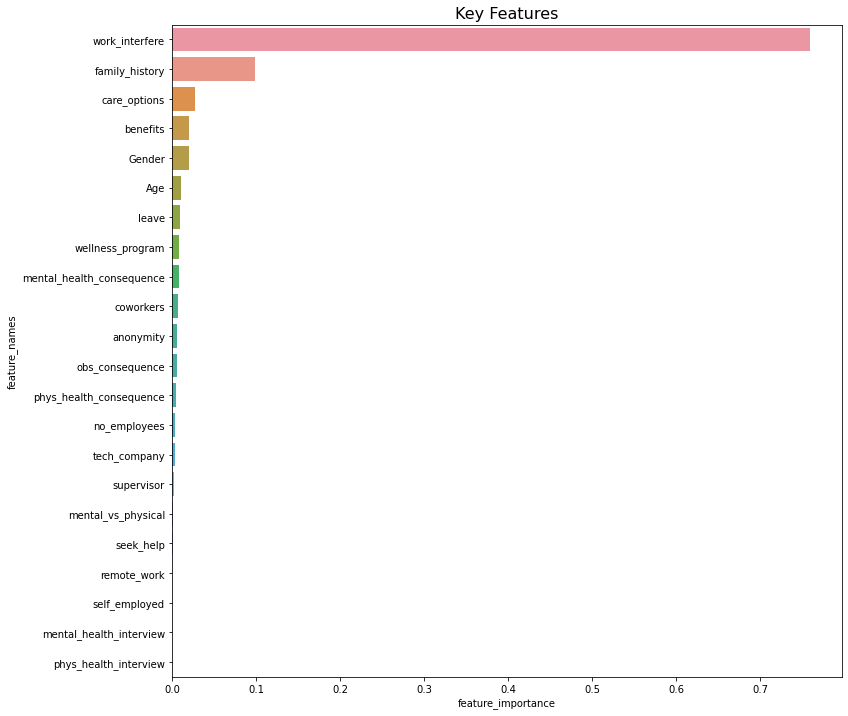

In [112]:
plt.figure(figsize=(12,12))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names')
plt.title("Key Features", fontsize=16)

Work interference has the largest contribution. Whether the employee's mental health issues interfering with the work is the thing that the company should ask for its employees.
Family history and care options(programs and benfits) provided by company is also influential in employees who want to get treatment.
For all the remaining features,there has been a little contribution.
noticing/knowing some of these features beforehand can even help support an individual who may be experiencing a mental health issues and and connect them with the appropriate employee resources.